In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.ticker as ticker
from tqdm.notebook import tqdm

# Configure font sizes.
TICK_SIZE = 6
SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 11
plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=TICK_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=TICK_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

MARKERSIZE = 3
LINEWIDTH = 0.5
plt.rc("lines", markersize=MARKERSIZE, linewidth=LINEWIDTH)
plt.rc("grid", linewidth=0.5)
plt.rc("grid", alpha=0.5)

# colorblind friendly colors: https://gist.github.com/thriveth/8560036
colors = ["#377eb8", "#ff7f00", "#4daf4a", "#f781bf", "#a65628", "#984ea3", "#999999", "#e41a1c", "#dede00"]

# how many questions does each dataset have?
N_QUESTIONS = {"bbh+gpqa+ifeval+math+musr" : 9574, "mmlu-pro" : 12032}

In [2]:
# load in our log files
best_baseline_summary = pd.read_csv("logs/final/cleaned/best_baseline_summary.csv")
best_ablation_summary = pd.read_csv("logs/final/cleaned/best_ablation_summary.csv")
faq_summary = pd.read_csv("logs/final/cleaned/faq_summary.csv")
uniform_summary = pd.read_csv("logs/final/cleaned/uniform_summary.csv")

# get our 10x budget values
budgets = best_baseline_summary.prop_budget.unique()

# ESS of FAQ, Best Baseline, and Uniform on the two datasets under ultra-sparse data conditions.

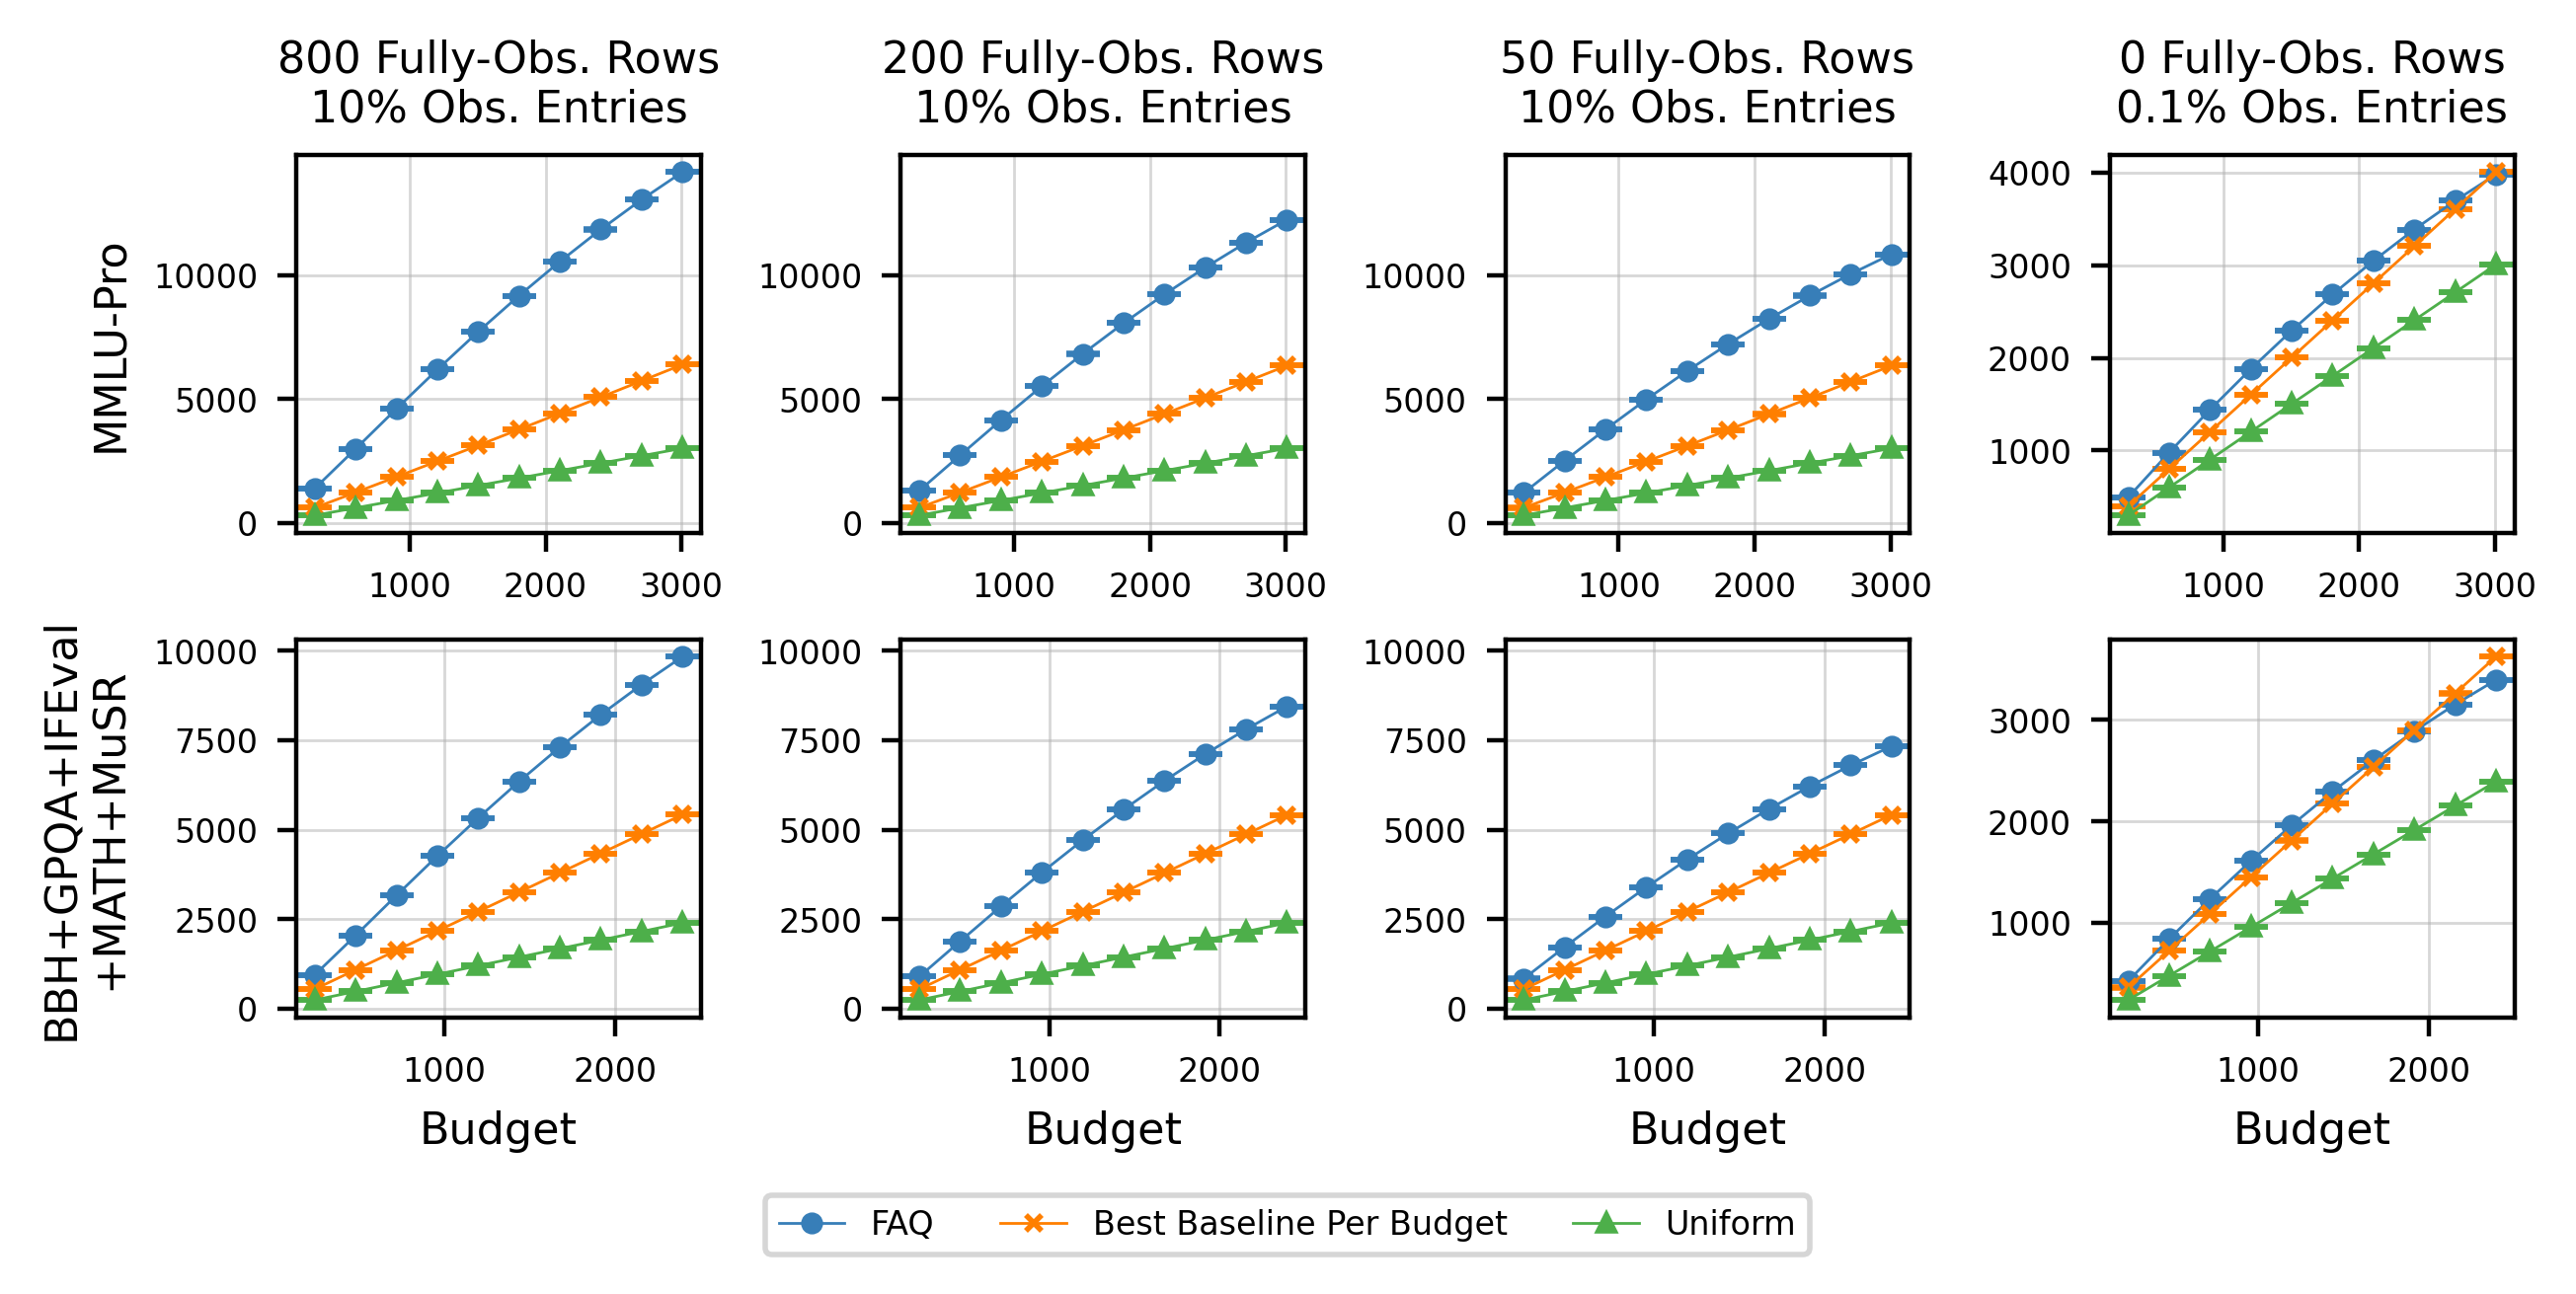

In [3]:
# we can put coverages in the appendix: let's just do a 2x2 of dataset x missingness-setting
fig, ax = plt.subplots(2, 4, dpi=400, figsize=(6.5, 3.0), sharex="row")

# go through our missingness-settings
for j, missingness_setting in enumerate([(800, 0.1), (200, 0.1), (50, 0.1), (0.0, 1e-3)]):
    
    # unpack the setting
    n_full_obs, mcar_obs_prob = missingness_setting
    
    # go thru the datasets
    for i, dataset in enumerate(["mmlu-pro", "bbh+gpqa+ifeval+math+musr"]):
        
        # get our data
        q_faq = faq_summary.query(
            f"dataset == '{dataset}' and n_full_obs == {n_full_obs} and mcar_obs_prob == {mcar_obs_prob}")
        q_baseline = best_baseline_summary.query(
            f"dataset == '{dataset}' and n_full_obs == {n_full_obs} and mcar_obs_prob == {mcar_obs_prob}")
        q_uniform = uniform_summary.query(f"dataset == '{dataset}'")
        
        # beautify
        ax[i, j].grid()
        
        # how many questions do we have?
        N_QUESTIONS = 12032 if dataset == "mmlu-pro" else 9574
        
        # label the subplot if necessary
        if j == 0:
            ax[i, j].set_ylabel(
                {"mmlu-pro" : "MMLU-Pro", "bbh+gpqa+ifeval+math+musr" : "BBH+GPQA+IFEval\n+MATH+MuSR"}[dataset])
        if i == 0:
            mcar_obs_prob_perc = mcar_obs_prob*100 if\
            int(mcar_obs_prob*100) != mcar_obs_prob*100 else int(mcar_obs_prob*100)
            ax[i, j].set_title(
                f"{int(n_full_obs)} Fully-Obs. Rows\n" +\
                f"{mcar_obs_prob_perc}% Obs. Entries")
        if i == 1:
            ax[i, j].set_xlabel(f"Budget")
        
        # FAQ results
        ax[i, j].errorbar(
            q_faq.prop_budget * N_QUESTIONS, q_faq.ess_multiplier * budgets * N_QUESTIONS, 
            yerr=q_faq.ess_multiplier_serr * budgets * N_QUESTIONS, marker="o", 
            capsize=MARKERSIZE, capthick=1.0, color=colors[0])
            
        # Best baseline results
        ax[i, j].errorbar(
            q_baseline.prop_budget * N_QUESTIONS, q_baseline.ess_multiplier * budgets * N_QUESTIONS, 
            yerr=q_baseline.ess_multiplier_serr * budgets * N_QUESTIONS, marker="x", 
            capsize=MARKERSIZE, capthick=1.0, color=colors[1])
        
        # uniform results
        ax[i, j].errorbar(
            q_uniform.prop_budget * N_QUESTIONS, q_uniform.ess_multiplier * budgets * N_QUESTIONS, 
            yerr=q_uniform.ess_multiplier_serr * budgets * N_QUESTIONS, marker="^", 
            capsize=MARKERSIZE, capthick=1.0, color=colors[2])
        
# custom legend
handles = [
    Line2D([], [], marker="o", color=colors[0], label="FAQ"),
    Line2D([], [], marker="x", color=colors[1], label="Best Baseline Per Budget"),
    Line2D([], [], marker="^", color=colors[2], label="Uniform")
]
fig.legend(handles=handles, ncol=3, loc="lower center", bbox_to_anchor=(0.5, -0.07))

# sharing axes
ax[0, 1].sharey(ax[0, 0]); ax[0, 2].sharey(ax[0, 0])
ax[1, 1].sharey(ax[1, 0]); ax[1, 2].sharey(ax[1, 0])

# beautify
plt.tight_layout()
plt.savefig("appendix_figures/1_ess_sparsity-settings_both-datasets.pdf", facecolor="white", bbox_inches="tight")
plt.show()

# Coverage of FAQ, Best Baseline, and Uniform on the two datasets under ultra-sparse data conditions.

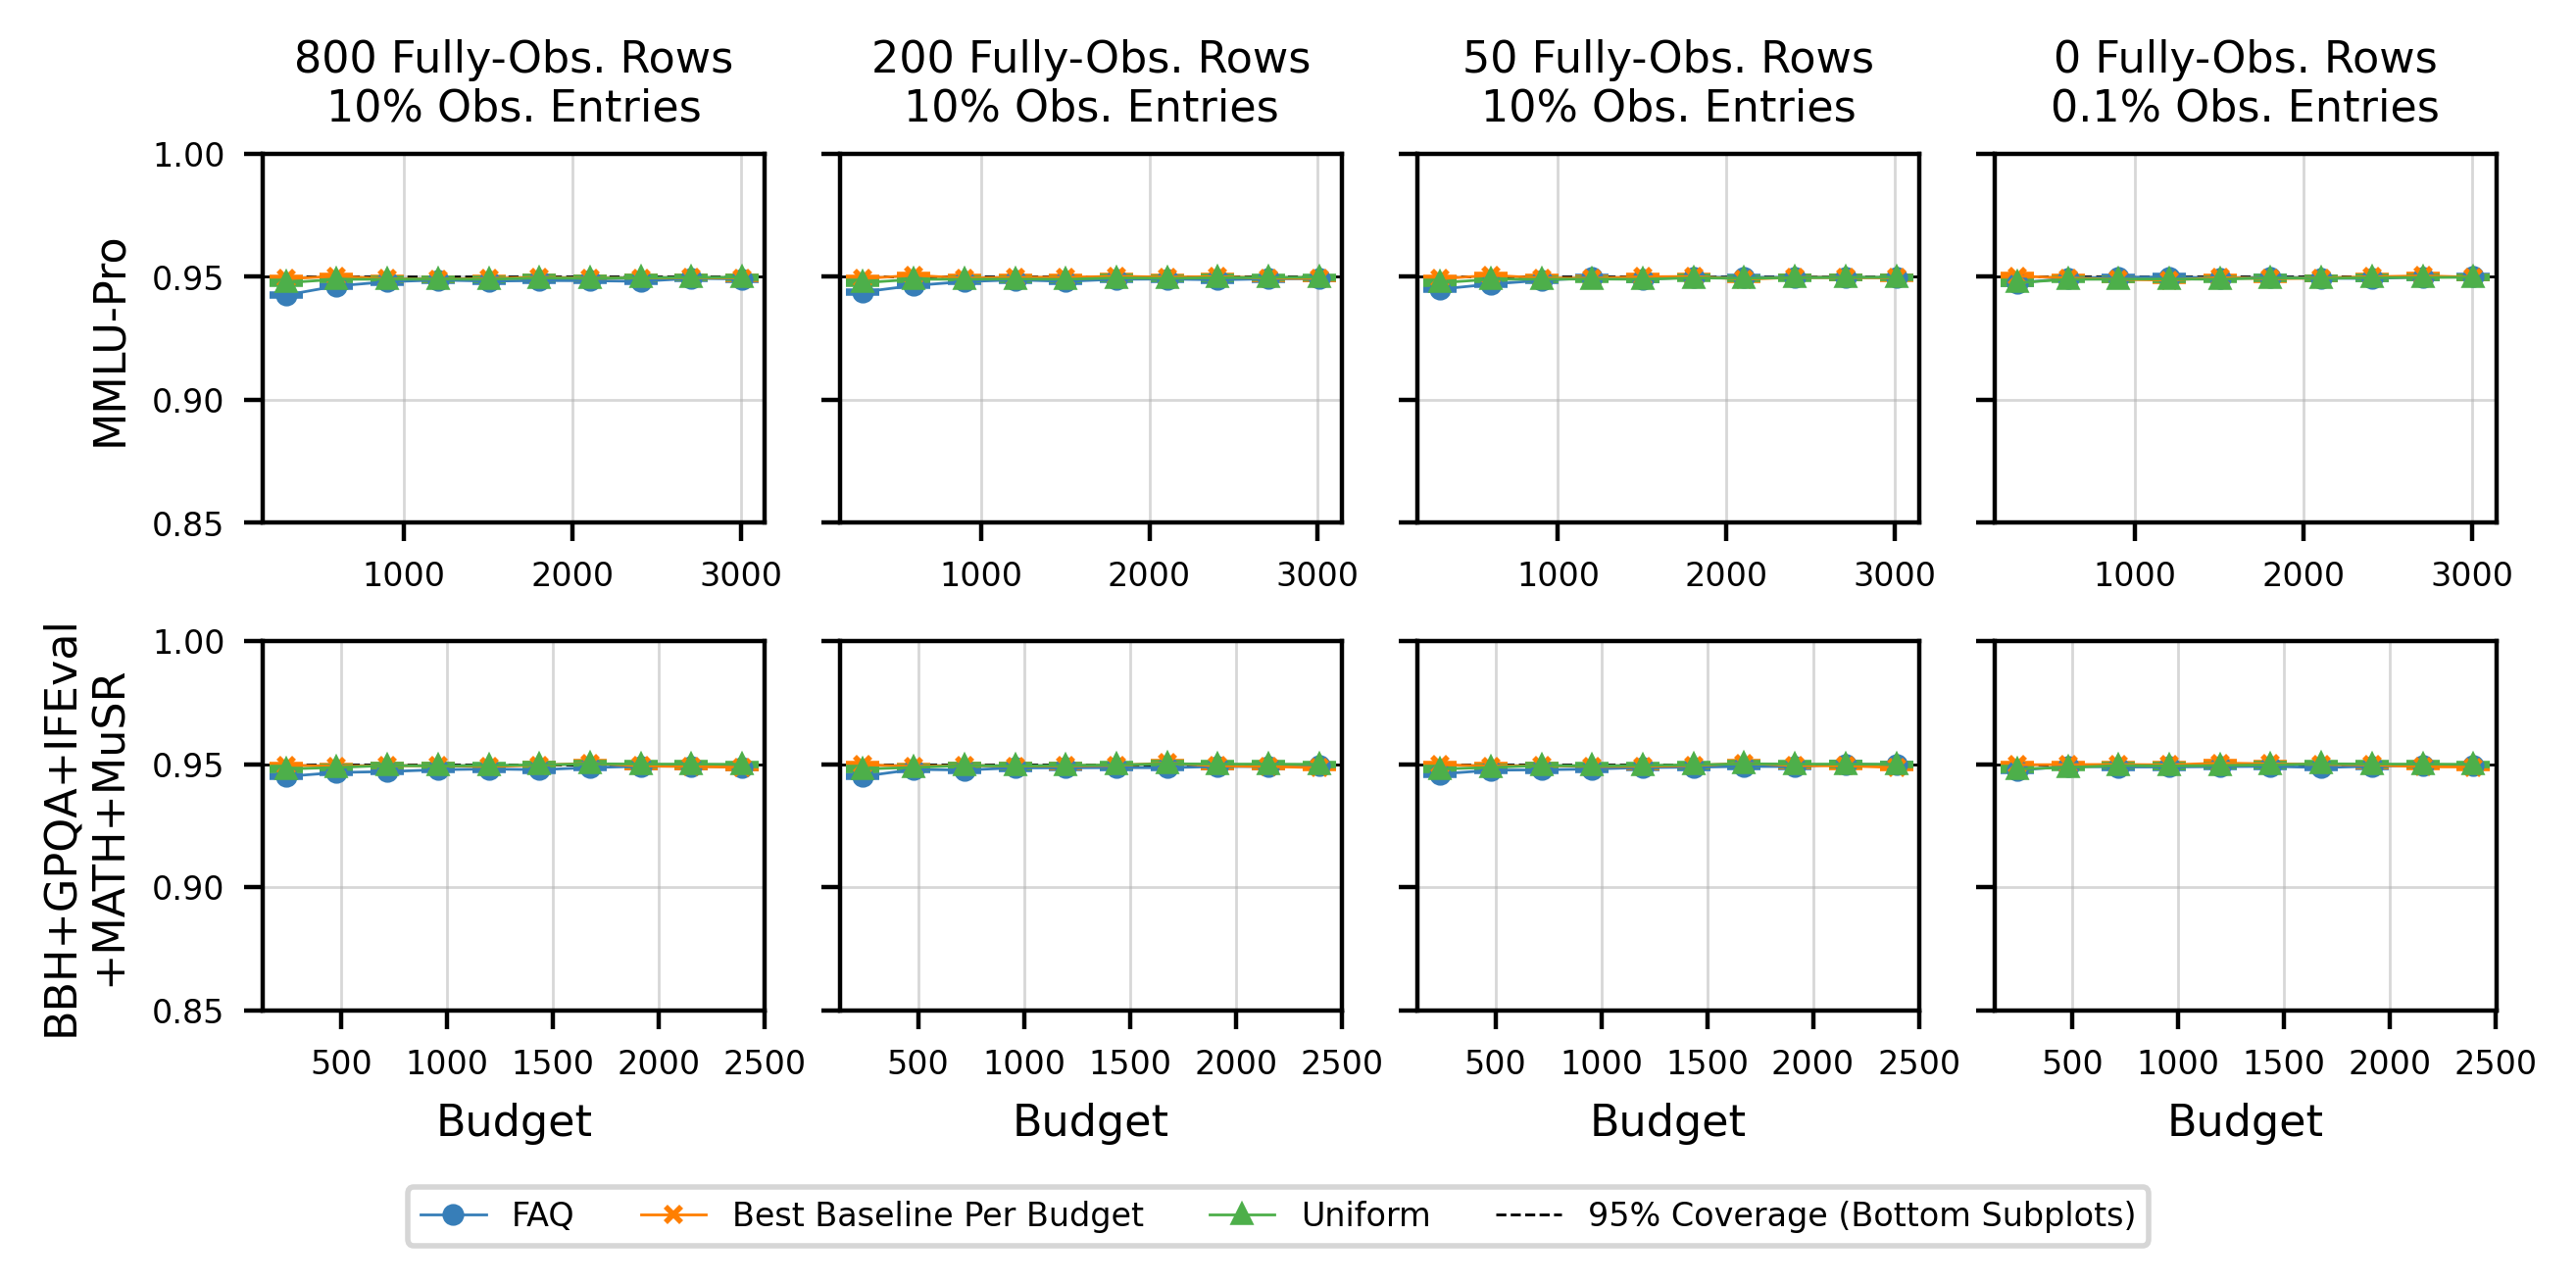

In [4]:
# we can put coverages in the appendix: let's just do a 2x2 of dataset x missingness-setting
fig, ax = plt.subplots(2, 4, dpi=400, figsize=(6.5, 3.0), sharex="row", sharey=True)

# go through our missingness-settings
for j, missingness_setting in enumerate([(800, 0.1), (200, 0.1), (50, 0.1), (0.0, 1e-3)]):
    
    # unpack the setting
    n_full_obs, mcar_obs_prob = missingness_setting
    
    # go thru the datasets
    for i, dataset in enumerate(["mmlu-pro", "bbh+gpqa+ifeval+math+musr"]):
        
        # get our data
        q_faq = faq_summary.query(
            f"dataset == '{dataset}' and n_full_obs == {n_full_obs} and mcar_obs_prob == {mcar_obs_prob}")
        q_baseline = best_baseline_summary.query(
            f"dataset == '{dataset}' and n_full_obs == {n_full_obs} and mcar_obs_prob == {mcar_obs_prob}")
        q_uniform = uniform_summary.query(f"dataset == '{dataset}'")
        
        # beautify
        ax[i, j].grid()
        ax[i, j].set_ylim(bottom=0.85, top=1.0)
        ax[i, j].axhline(y=0.95, color="black", linestyle="--")
        
        # how many questions do we have?
        N_QUESTIONS = 12032 if dataset == "mmlu-pro" else 9574
        
        # label the subplot if necessary
        if j == 0:
            ax[i, j].set_ylabel(
                {"mmlu-pro" : "MMLU-Pro", "bbh+gpqa+ifeval+math+musr" : "BBH+GPQA+IFEval\n+MATH+MuSR"}[dataset])
        if i == 0:
            mcar_obs_prob_perc = mcar_obs_prob*100 if\
            int(mcar_obs_prob*100) != mcar_obs_prob*100 else int(mcar_obs_prob*100)
            ax[i, j].set_title(
                f"{int(n_full_obs)} Fully-Obs. Rows\n" +\
                f"{mcar_obs_prob_perc}% Obs. Entries")
        if i == 1:
            ax[i, j].set_xlabel(f"Budget")
        
        # FAQ results
        ax[i, j].errorbar(
            q_faq.prop_budget * N_QUESTIONS, q_faq.coverage, 
            yerr=q_faq.coverage_serr, marker="o", 
            capsize=MARKERSIZE, capthick=1.0, color=colors[0])
            
        # Best baseline results
        ax[i, j].errorbar(
            q_baseline.prop_budget * N_QUESTIONS, q_baseline.coverage, 
            yerr=q_baseline.coverage_serr, marker="x", 
            capsize=MARKERSIZE, capthick=1.0, color=colors[1])
        
        # uniform results
        ax[i, j].errorbar(
            q_uniform.prop_budget * N_QUESTIONS, q_uniform.coverage, 
            yerr=q_uniform.coverage_serr, marker="^", 
            capsize=MARKERSIZE, capthick=1.0, color=colors[2])
        
# custom legend
handles = [
    Line2D([], [], marker="o", color=colors[0], label="FAQ"),
    Line2D([], [], marker="x", color=colors[1], label="Best Baseline Per Budget"),
    Line2D([], [], marker="^", color=colors[2], label="Uniform"),
    Line2D([], [], color="black", linestyle="--", label="95% Coverage (Bottom Subplots)")
]
fig.legend(handles=handles, ncol=4, loc="lower center", bbox_to_anchor=(0.5, -0.07))

# beautify
plt.tight_layout()
plt.savefig("appendix_figures/2_coverage_sparsity-settings_both-datasets.pdf", facecolor="white", bbox_inches="tight")
plt.show()

# Widths of FAQ, Best Baseline, and Uniform on the two datasets under ultra-sparse data conditions.

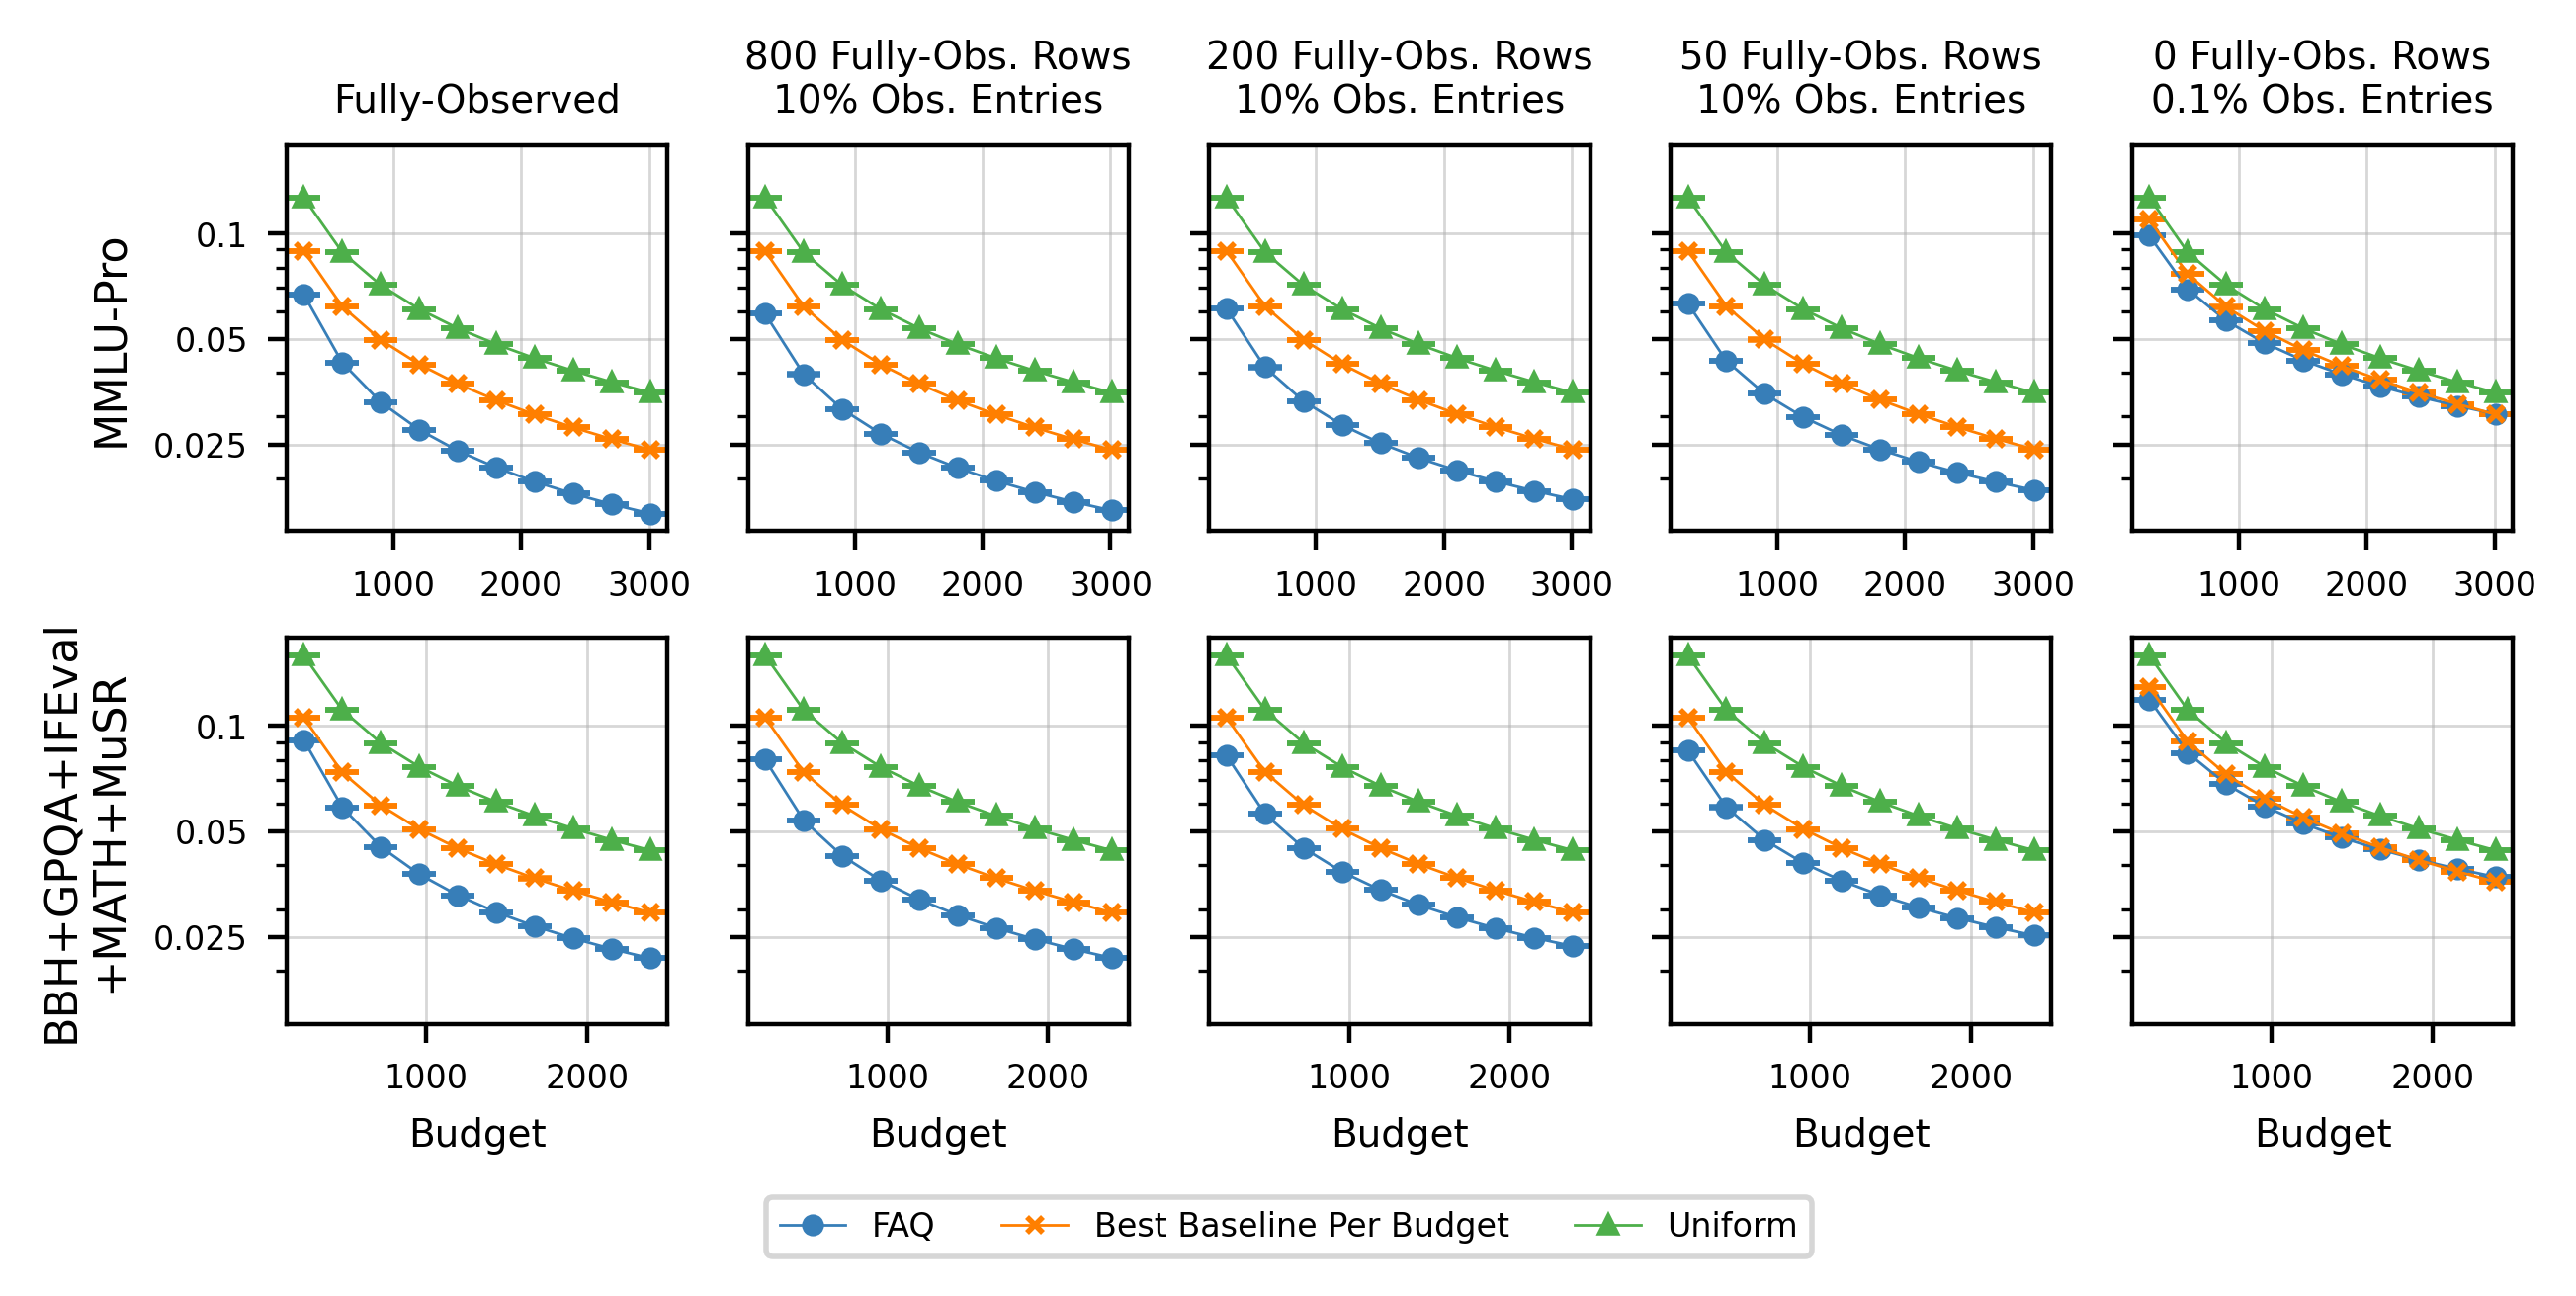

In [5]:
# we can put coverages in the appendix: let's just do a 2x2 of dataset x missingness-setting
fig, ax = plt.subplots(2, 5, dpi=400, figsize=(6.5, 3.0), sharex="row", sharey=True)

# go through our missingness-settings
for j, missingness_setting in enumerate([(None, 1.0), (800, 0.1), (200, 0.1), (50, 0.1), (0.0, 1e-3)]):
    
    # unpack the setting
    n_full_obs, mcar_obs_prob = missingness_setting
    
    # go thru the datasets
    for i, dataset in enumerate(["mmlu-pro", "bbh+gpqa+ifeval+math+musr"]):
        
        # get our data
        if n_full_obs is not None:
            q_faq = faq_summary.query(
                f"dataset == '{dataset}' and n_full_obs == {n_full_obs} and mcar_obs_prob == {mcar_obs_prob}")
            q_baseline = best_baseline_summary.query(
                f"dataset == '{dataset}' and n_full_obs == {n_full_obs} and mcar_obs_prob == {mcar_obs_prob}")
            q_uniform = uniform_summary.query(f"dataset == '{dataset}'")
        else:
            q_faq = faq_summary.query(
                f"dataset == '{dataset}' and mcar_obs_prob == {mcar_obs_prob}")
            q_baseline = best_baseline_summary.query(
                f"dataset == '{dataset}' and mcar_obs_prob == {mcar_obs_prob}")
            q_uniform = uniform_summary.query(f"dataset == '{dataset}'")
        
        # beautify
        ax[i, j].grid(); ax[i, j].set_yscale("log")
        ax[i, j].set_yticks([0.025, 0.05, 0.1])
        ax[i, j].set_yticklabels([0.025, 0.05, 0.1])
        
        # how many questions do we have?
        N_QUESTIONS = 12032 if dataset == "mmlu-pro" else 9574
        
        # label the subplot if necessary
        if j == 0:
            ax[i, j].set_ylabel(
                {"mmlu-pro" : "MMLU-Pro", "bbh+gpqa+ifeval+math+musr" : "BBH+GPQA+IFEval\n+MATH+MuSR"}[dataset])
        if i == 0:
            mcar_obs_prob_perc = mcar_obs_prob*100 if\
            int(mcar_obs_prob*100) != mcar_obs_prob*100 else int(mcar_obs_prob*100)
            if n_full_obs is not None:
                ax[i, j].set_title(
                    f"{int(n_full_obs)} Fully-Obs. Rows\n" +\
                    f"{mcar_obs_prob_perc}% Obs. Entries", fontsize=BIGGER_SIZE - 4)
            else:
                ax[i, j].set_title("Fully-Observed", fontsize=BIGGER_SIZE - 4)
        if i == 1:
            ax[i, j].set_xlabel(f"Budget", fontsize=BIGGER_SIZE - 4)
        
        # FAQ results
        ax[i, j].errorbar(
            q_faq.prop_budget * N_QUESTIONS, q_faq.mean_width, 
            yerr=q_faq.mean_width_serr, marker="o", 
            capsize=MARKERSIZE, capthick=1.0, color=colors[0])
            
        # Best baseline results
        ax[i, j].errorbar(
            q_baseline.prop_budget * N_QUESTIONS, q_baseline.mean_width, 
            yerr=q_baseline.mean_width_serr, marker="x", 
            capsize=MARKERSIZE, capthick=1.0, color=colors[1])
        
        # uniform results
        ax[i, j].errorbar(
            q_uniform.prop_budget * N_QUESTIONS, q_uniform.mean_width, 
            yerr=q_uniform.mean_width_serr, marker="^", 
            capsize=MARKERSIZE, capthick=1.0, color=colors[2])
        
# custom legend
handles = [
    Line2D([], [], marker="o", color=colors[0], label="FAQ"),
    Line2D([], [], marker="x", color=colors[1], label="Best Baseline Per Budget"),
    Line2D([], [], marker="^", color=colors[2], label="Uniform")
]
fig.legend(handles=handles, ncol=4, loc="lower center", bbox_to_anchor=(0.5, -0.07))

# beautify
plt.tight_layout()
plt.savefig("appendix_figures/3_width_all-settings_both-datasets.pdf", facecolor="white", bbox_inches="tight")
plt.show()

# Coverage vs. model release date / accuracy on MMLU-Pro @ 7.5%.

In [6]:
# load in the logs for coverage-specific analysis
coverage_logs = pd.concat(
    [pd.read_csv(f"logs/coverage_analysis/{f}") 
     for f in os.listdir("logs/coverage_analysis") if ".csv" in f
    ])

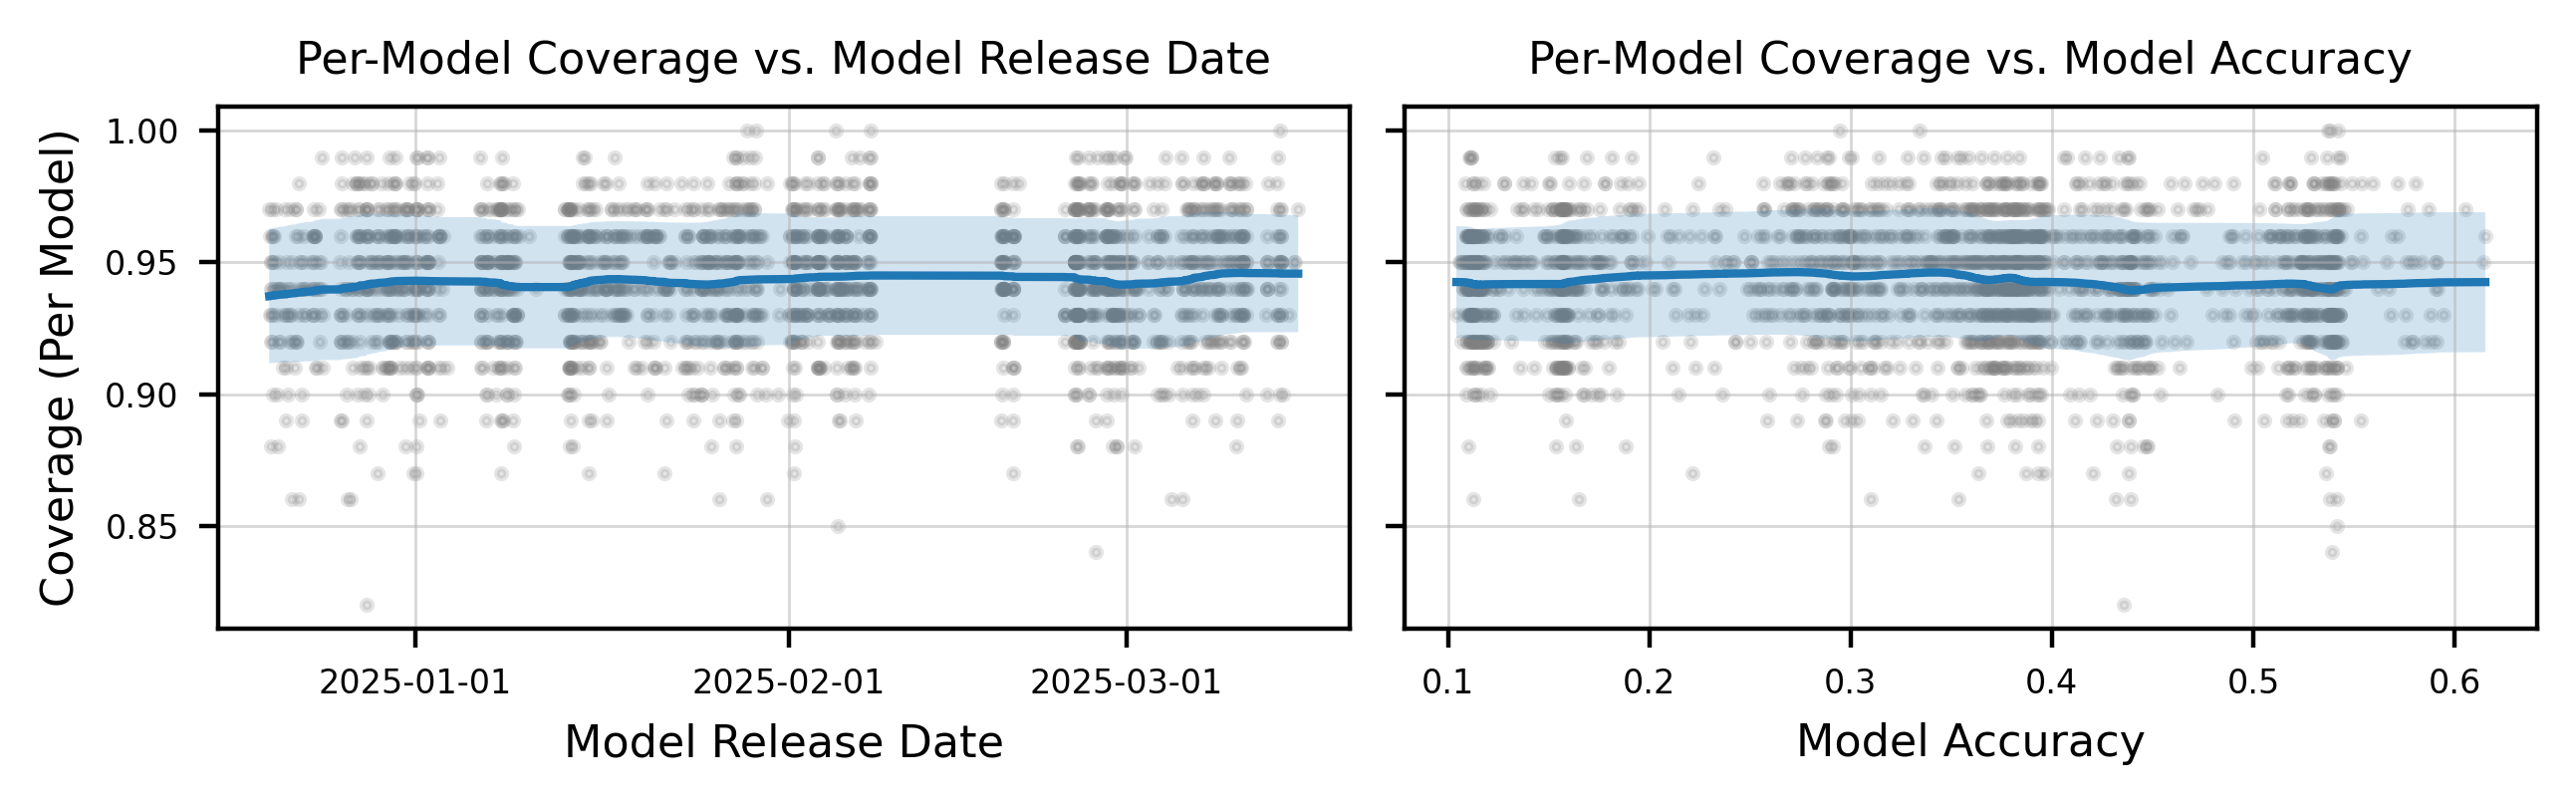

In [7]:
'''
Does coverage change depending on the model (e.g., its accuracy / when it was released?)
    - Important because we could have overall coverage, but the coverage decays with temporal drift ...
    - Let's put 7.5% as a representative example in main text, remainder in Appendix for transparency.
    - Let's do it by release date and by actual accuracy. Use bbh+gpqa+ifeval+math+musr
    
*To clean up plot:
1. Let's do K=501 k-NN by release date (left) and model accuracy (right)
2. Set kernel to K / 6 to have ~99% mass within +/- 3 SD.
'''
# how many seeds do we have? Dataset for the appendix complementary figure.
N_SEEDS, prop_budget, dataset = 100, 0.075, "mmlu-pro"

# choose nearest-K and the Gaussian window std (in "points", not x-units)
K = 501
MIN_PERIODS = 30
GAUSS_STD = K / 6 # want ~99% mass within +/- 3 std inside the K window, general rule of thumb.

# load in the extra data that we need (just M2)
M2 = pd.read_csv(f"data/processed/{dataset}/M2.csv")
M2.created_date = pd.to_datetime(M2.created_date)

# create our figure
fig, ax = plt.subplots(1, 2, dpi=400, figsize=(6.5, 2.0), sharey=True)

#### BY RELEASE DATE

# beautify the subplot
ax[0].grid(); ax[0].set_title("Per-Model Coverage vs. Model Release Date")
ax[0].set_xlabel("Model Release Date")

coverages = coverage_logs.query(
    f"dataset == '{dataset}' and prop_budget == {prop_budget}"
).iloc[:,3:].dropna(axis=1).to_numpy()

# precompute the coverages (avg of 100 0-1 numbers)
per_model_cov = coverages.mean(axis=0)

# raw scatter plot results of the 2.2K numbers.
ax[0].scatter(x=M2.created_date.values, y=per_model_cov, color="grey", alpha=0.2, s=MARKERSIZE)

# do Gaussian-weighted K-nearest-neighbors smoothing by release date.
df = pd.DataFrame({"created_date": M2.created_date, "coverage": per_model_cov})
df = df.sort_values("created_date").set_index("created_date")
roll = df["coverage"].rolling(window=K, win_type="gaussian", center=True, min_periods=MIN_PERIODS)

# need to compute standard deviations via moments (i.e., sqrt of variance)
Ey  = roll.mean(std=GAUSS_STD) # this mean here is weighted mean, with weighting by Gaussian weights.
Ey2 = (df["coverage"]**2).rolling(
    window=K, win_type="gaussian", center=True, min_periods=MIN_PERIODS
).mean(std=GAUSS_STD)

# compute the standard deviation.
sd = np.sqrt((Ey2 - Ey**2).clip(lower=0.0))

# store our moving average (gaussian-smoothed) as a dataframe
mov_avg = pd.DataFrame({"mean": Ey, "sd": sd})

# plot the mean line + a \pm 1 SD band.
ax[0].plot(mov_avg.index, mov_avg["mean"], linewidth=1.5, zorder=3)
ax[0].fill_between(
    mov_avg.index,
    mov_avg["mean"] - mov_avg["sd"],
    mov_avg["mean"] + mov_avg["sd"],
    alpha=0.2, zorder=1)

# beautify a bit more.
ax[0].set_xticks([pd.Timestamp(2025, 1, 1), pd.Timestamp(2025, 2, 1), pd.Timestamp(2025, 3, 1)])
ax[0].set_ylabel("Coverage (Per Model)")

#### BY TEST ACCURACY

# beautify the subplot
ax[1].grid(); ax[1].set_title("Per-Model Coverage vs. Model Accuracy")
ax[1].set_xlabel("Model Accuracy")

# compute the true accuracies per M2 model.
mus_M2 = M2.iloc[:,3:].mean(axis=1).values
acc_order = np.argsort(mus_M2)

# sort the coverages by increasing true accuracy
sorted_acc = mus_M2[acc_order]
sorted_model_coverages = per_model_cov[acc_order]

# scatter plot the raw coverages in high opacity.
ax[1].scatter(sorted_acc, sorted_model_coverages, color="grey", alpha=0.2, s=MARKERSIZE)

# do Gaussian-weighted K-nearest-neighbors smoothing by model accuracy
df = pd.DataFrame({"acc": sorted_acc, "coverage": sorted_model_coverages})
df = df.sort_values("acc").set_index("acc")
roll = df["coverage"].rolling(window=K, win_type="gaussian", center=True, min_periods=MIN_PERIODS)

# compute the standard deviation via moment formula (same as above)
Ey  = roll.mean(std=GAUSS_STD)
Ey2 = (df["coverage"]**2).rolling(
    window=K, win_type="gaussian", center=True, min_periods=MIN_PERIODS
).mean(std=GAUSS_STD)
sd = np.sqrt((Ey2 - Ey**2).clip(lower=0.0))

# store our moving average (gaussian-smoothed) as a dataframe
mov_avg = pd.DataFrame({"mean": Ey, "sd": sd})

# plot the mean line + a \pm 1 SD band.
ax[1].plot(mov_avg.index, mov_avg["mean"], linewidth=1.5, zorder=3)
ax[1].fill_between(
    mov_avg.index,
    mov_avg["mean"] - mov_avg["sd"],
    mov_avg["mean"] + mov_avg["sd"],
    alpha=0.2, zorder=1)

# beautify + save
plt.tight_layout()
plt.savefig("appendix_figures/4_MMLU-pro_coverage-audits.pdf", facecolor="white", bbox_inches="tight")
plt.show()